In [142]:
import numpy as np
import pandas as pd

In [143]:
data = pd.read_csv('diabetes.csv')

In [144]:
data.shape

(768, 9)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [158]:
data.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [147]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [148]:
df = data[['Glucose']].values
d = data[["BloodPressure"]].values

In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,d,test_size=0.4,random_state=0)

In [150]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

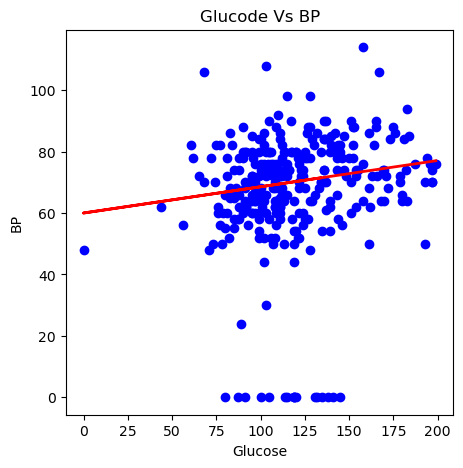

In [151]:
import matplotlib.pyplot as plt
y_pred = model.predict(x_test)
plt.figure(figsize=(5,5))
plt.scatter(x_test, y_test, color='blue')  # Actual data points
plt.plot(x_test, y_pred, color='red', linewidth=2)  # Regression line
plt.title('Glucode Vs BP')
plt.ylabel('BP')
plt.xlabel('Glucose')
plt.show()

In [152]:
from sklearn import metrics

In [163]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calculate the coefficient of determination (R^2)
r2 = metrics.r2_score(y_test, y_pred)
print('Coefficient of Determination (R^2):', r2)

Coefficients: [[0.08551996]]
Intercept: [59.99750218]
Mean Absolute Error: 12.701448099277343
Mean Squared Error: 403.8400076807987
Root Mean Squared Error: 20.095770890433606
Coefficient of Determination (R^2): -0.0013504941104351964
